In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


data = pd.read_csv('manufacturing.csv')
data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [20]:
X = data.drop('Quality Rating', axis=1)
y = data['Quality Rating']


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Polynomial Regression model
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

ypred = model.predict(X_test)



In [ ]:
# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print(f"Polynomial Degree: {degree}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression")
print(f"MSE: {mse_linear:.4f}")
print(f"R² Score : {r2_linear:.4f}")

Polynomial Degree: 4
Mean Squared Error: 4.3874
R² Score: 0.9785
Linear Regression
MSE: 99.1026
R² Score : 0.5146


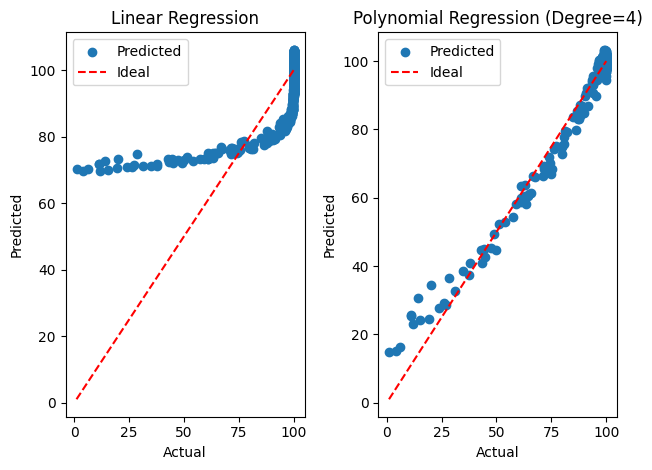

In [28]:
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, ypred, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Polynomial Regression (Degree={degree})")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Polynomial Regression model
accuracy = {}
for i in range(1,5):
    degree = i
    print(f"Degree: {degree}")

    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(f"Mean Squared Error: {mean_squared_error(y_test, ypred):.4f}")
    print(f"R² Score: {r2_score(y_test, ypred):.4f}")
    accuracy[degree] = (r2_score(y_test, ypred))*100


Degree: 1
Mean Squared Error: 99.1026
R² Score: 0.5146
Degree: 2
Mean Squared Error: 29.9628
R² Score: 0.8532
Degree: 3
Mean Squared Error: 9.0176
R² Score: 0.9558
Degree: 4
Mean Squared Error: 4.3874
R² Score: 0.9785


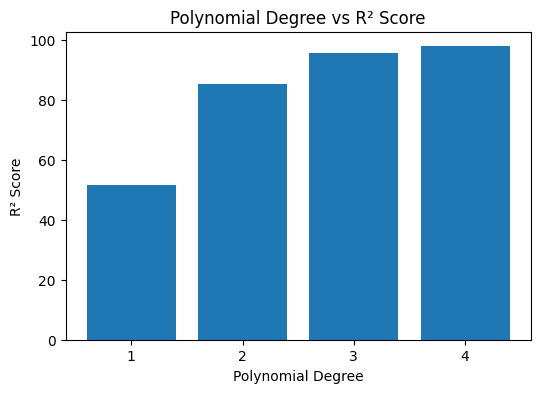

In [54]:
plt.figure(figsize=(6, 4))
plt.bar(accuracy.keys(), accuracy.values())
# plt.plot(accuracy.keys(), accuracy.values(), color='red')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('Polynomial Degree vs R² Score')
plt.xticks(list(accuracy.keys()))
plt.show()


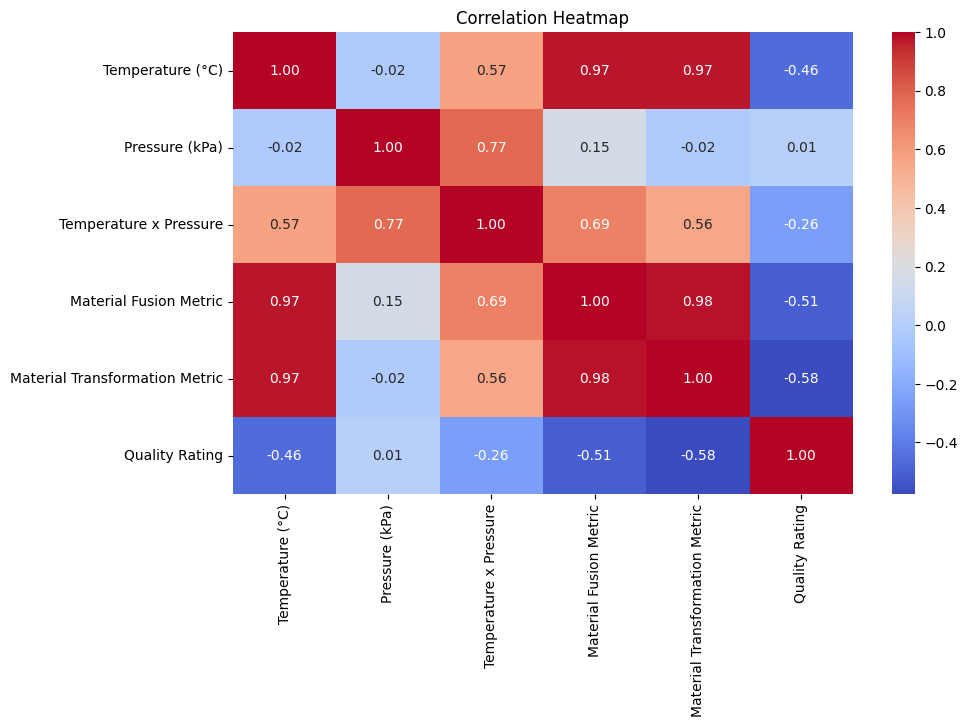

In [51]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
